# Unsupervised clustering

##### Libraries

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # makes figs nicer!

## Goals of this lecture
 
- Introducing **unsupervised approaches**: dealing with *unlabeled data*.  
- Finding structure with **K-means clustering**. 

## Unsupervised approaches: an introduction

Broadly, statistical modeling approaches can be either:

- **Supervised**: learn from some function $f$ mapping **features** to **labels** ($Y$) $X$ t$Y$.  
- **Unsupervised**: learning some function $f$ finding structure in **features**, *without* labels.

So far, all the models we've discussed (e.g., linear regression, logistic regression), have been *supervised*.

### Why unsupervised learning?

> In [**unsupervised learning**](https://en.wikipedia.org/wiki/Unsupervised_learning), a model learns patterns from unlabeled data.

This is useful for a few reasons:

- It's **practical**: doesn't require defining or acquiring *labels* for data.
- It's **conceptually interesting**: humans (arguably) don't have direct, supervised feedback.
   - Labels or categories often **emerge** from exposure to data––they don't exist *a priori*.
- It's **helpful**: unsupervised approaches help identify *structure* in a dataset. 
   - Useful for **exploratory data analysis**.

### The challenge of unsupervised learning

Supervised learning is straightforward:

- Clear *goal*: predict $Y$ from $X$.  
- Clear *evaluation metric*: how well did we predict $Y$?

Unsupervised learning is harder to define:

- What is our **goal**?
- How do we **check our work**?

### Unsupervised learning in action

Despite these challenges, unsupervised learning is of *growing importance* to computational researchers.

Many examples of its use:

- Clustering *cells* on their *gene expressions* to identify different **cancer subtypes**. 
- Identify *groups* of shoppers based on *shopping habits* to develop different **advertising schemes**. 
- Clustering *word uses* (e.g., "river bank" vs. "financial bank") to identify **distinct meanings**. 

## Clustering

> **Clustering** refers to any approach towards finding *sub-groups* (i.e., "clusters") in a dataset.

Basic goal:

- Put observations $x_i$ and $x_j$ in the same cluster if similar.
- Put observations $x_i$ and $x_j$ in different clusters if they are different.

Of course, this requires **defining** what makes two observations similar or different.

### Introducing $K$-means clustering

> [**K-means clustering**](https://en.wikipedia.org/wiki/K-means_clustering) is a clustering approach that aims to partition $n$ observations into $k$ *non-overlapping* clusters.

Ideally, we would like to do this in a way that **minimizes** within-cluster variation.

**Check-in**: What's one intuitive way we could **define** within-cluster variation?

#### Defining within-cluster variation

A simple way to define within-cluster variation is as follows:

$\Large \frac{1}{n}*\sum_i(x_i - \bar{x_i})^2$

This is the **average squared distance** of each point from the mean of that cluster.

Basic intuition:

- A "good" cluster is one with low variance.  
- A "bad" cluster is one which has high variance.

### The $K$-means algorithm

There are many ways to partition $n$ points into $k$ groups. 

The $K$-means algorithm gives us a **"local optimum"**––not perfect, but pretty good.

- Start by determining desired number of clusters ($k$). 
- Then, randomly assign each observation to a random cluster $k$.
- Now, iterate until the cluster assignment stops changing...
   - For each cluster $k$, compute the **centroid** (the mean)
   - Assign each observation to the cluster whose centroid is *closest* (using Euclidean distance).

After many **iterations**, this algorithm converges onto a locally optimal solution.

### $K$-means in practice

To illustrate $K$-means, we'll *code it from scratch*. First, we'll generate a small dataset for demonstration purposes.

In [125]:
from sklearn.datasets import make_blobs ### easy way to make clusters

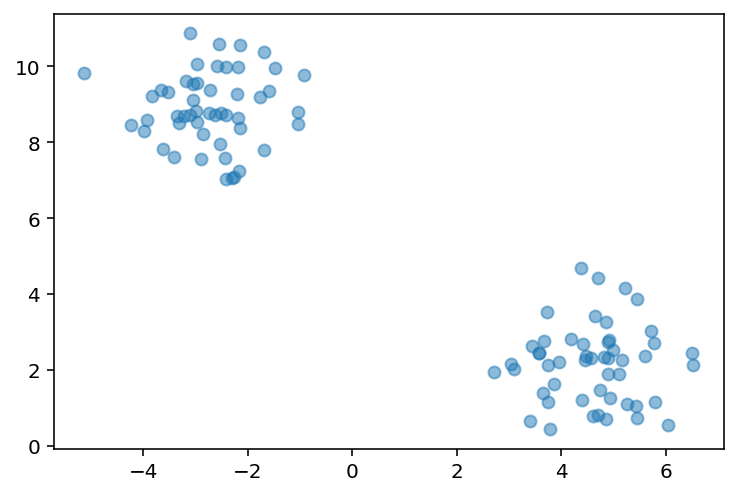

In [126]:
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], alpha = .5)

#### Step 1: determine $K$

- The first step is determining the **number of clusters**.  
- This is not a trivial step––but one approach is to *start small*, e.g., $K = 2$.
   - Ideally, we could test multiple values of $K$, and test which is **optimal**. 

Let's set $K = 2$.

In [127]:
K = 2

#### Step 2: Randomly assign points to clusters

Now, we randomly assign either a `0` or a `1` to each point.

<AxesSubplot:>

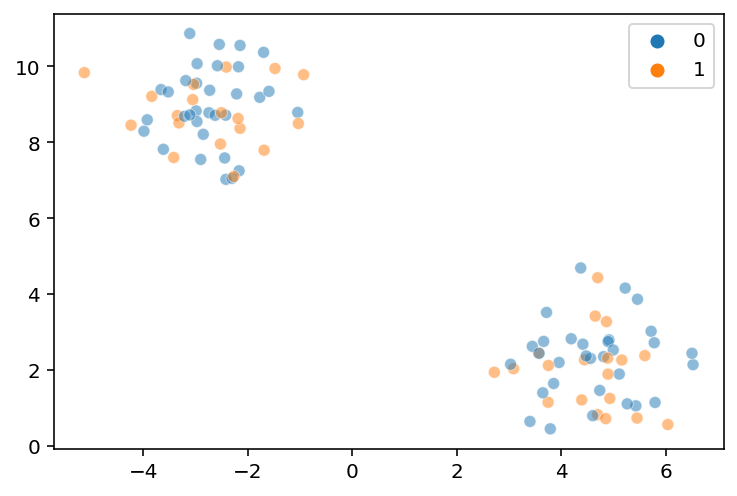

In [128]:
labels = np.random.randint(K, size = len(X))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labels, alpha = .5)

#### Step 3a: Calculate cluster centroids

Now, we compute the **average** of points randomly assigning to $K = 0$ vs. $K = 1$.

In [129]:
c1_mean = X[labels==0].mean(axis=0)
c2_mean = X[labels==1].mean(axis=0)
print("Cluster 1 mean: {x}".format(x = c1_mean))
print("Cluster 2 mean: {x}".format(x = c2_mean))

Cluster 1 mean: [0.910053   5.67980083]
Cluster 2 mean: [1.0254252  5.27506464]


#### Overlaying cluster centroids...

<AxesSubplot:>

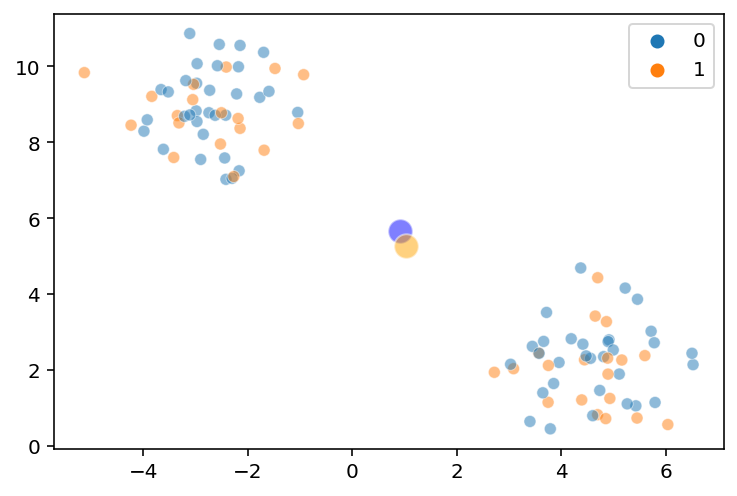

In [130]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = labels, alpha = .5)
sns.scatterplot(x = [c1_mean[0]], y = [c1_mean[1]], color = "blue", s = 150, alpha = .5)
sns.scatterplot(x = [c2_mean[0]], y = [c2_mean[1]], color = "orange", s = 150, alpha = .5)
# sns.scatterplot(x = c2_mean[0], y = c2_mean[1], hue = "orange", s = 100)

#### Step 3b: reassign points

Now, we **reassign** points to the nearest cluster centroid.

In [131]:
from scipy.spatial.distance import euclidean

In [132]:
d_c1 = [euclidean(i, c1_mean)**2 for i in X]
d_c2 = [euclidean(i, c2_mean)**2 for i in X]

In [133]:
new_labels = []
for index, point in enumerate(X):
    ### compare distance to c1 vs. c2
    if d_c1[index] < d_c2[index]:
        new_labels.append(0)
    else:
        new_labels.append(1)
new_labels = np.array(new_labels)

#### Step 3a: Re-compute centroids

In [134]:
c1_mean = X[new_labels==0].mean(axis=0)
c2_mean = X[new_labels==1].mean(axis=0)
print("Cluster 1 mean: {x}".format(x = c1_mean))
print("Cluster 2 mean: {x}".format(x = c2_mean))

Cluster 1 mean: [-2.70292301  8.89011496]
Cluster 2 mean: [4.60840443 2.16998192]


#### Overlaying cluster centroids (again)

Within one iteration, we've sorted our points into very distinct clusters!

<AxesSubplot:>

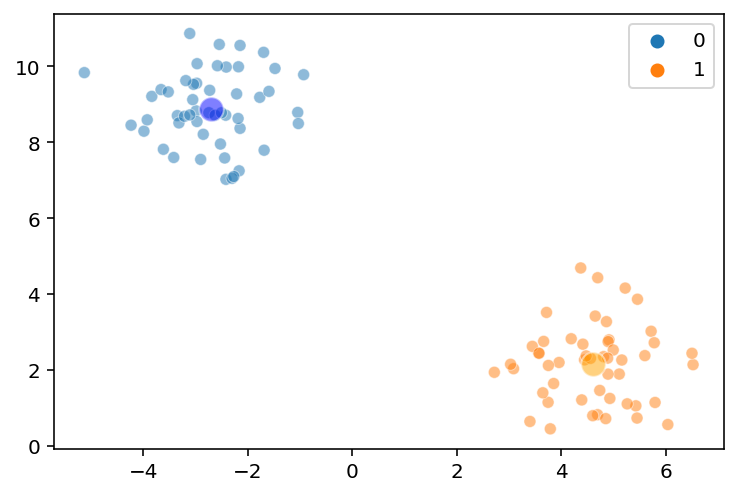

In [135]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = new_labels, alpha = .5)
sns.scatterplot(x = [c1_mean[0]], y = [c1_mean[1]], color = "blue", s = 150, alpha = .5)
sns.scatterplot(x = [c2_mean[0]], y = [c2_mean[1]], color = "orange", s = 150, alpha = .5)
# sns.scatterplot(x = c2_mean[0], y = c2_mean[1], hue = "orange", s = 100)

### $K$-means with `sklearn`

Fortunately, you won't need to code the $K$-means algorithm by hand. The `sklearn` package has a `KMeans` algorithm built-in.

```python
KMeans(n_clusters = ### decide k
       n_iter = ### number of iterations
       ...)
```

Steps to using `KMeans`:

1. Import and instantiate the `KMeans` class.  
2. Use `fit_predict` on `X` to **fit** the algorithm and **generate** labels.

In [136]:
from sklearn.cluster import KMeans

#### Replicating analysis with `KMeans`

In [137]:
k = KMeans(n_clusters = K)
kmeans_labels = k.fit_predict(X)

<AxesSubplot:>

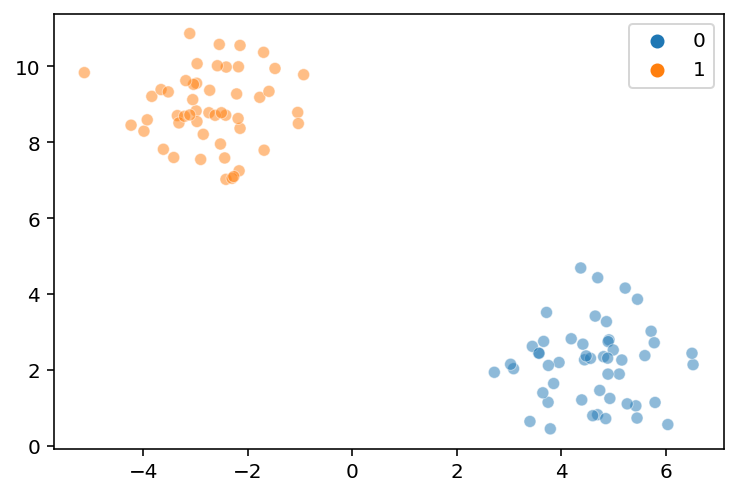

In [138]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = kmeans_labels, alpha = .5)

### Applying to the `iris` dataset

Now, we will apply `KMeans` to the famous `iris` dataset. 

- Our goal will be to *cluster* the dataset... 
- ... then see whether the clusters correspond to the true `species` labels.

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

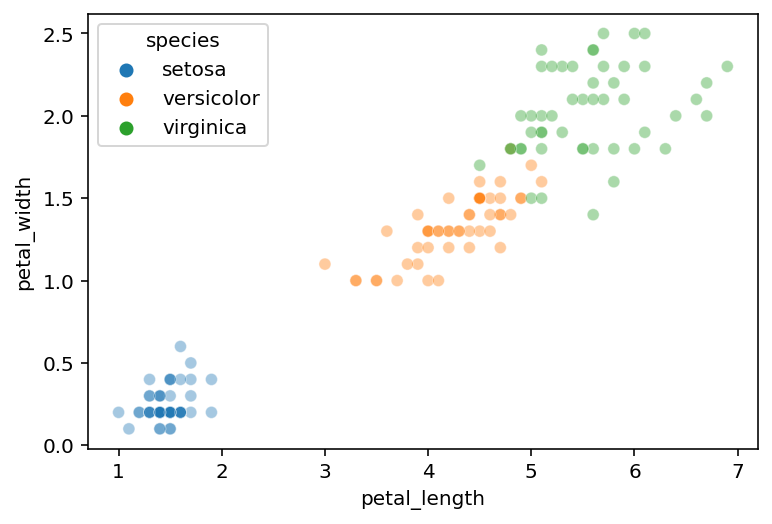

In [139]:
df_iris = sns.load_dataset("iris")
sns.scatterplot(data = df_iris, x = "petal_length", y = "petal_width", hue = "species", alpha = .4)

#### Check-in

Apply `KMeans` with `k = 2` to the `iris` dataset (focusing on the features below), then visualize your clusters. What does it look like?

In [141]:
features = df_iris[['petal_length', 'petal_width']].values
### Your code here

#### Clustering with $K = 2$

Not bad––although we *know* that `species = 3`, so it's obviously not perfect.

<AxesSubplot:>

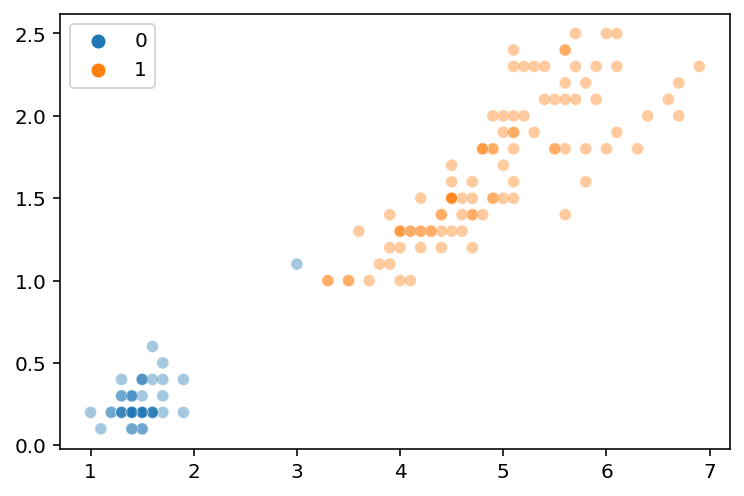

In [145]:
new_labels = KMeans(n_clusters = 2).fit_predict(features)
sns.scatterplot(x = features[:,0], y = features[:, 1], hue = new_labels, alpha = .4)

#### Clustering with $K = 3$

Much better.

<AxesSubplot:>

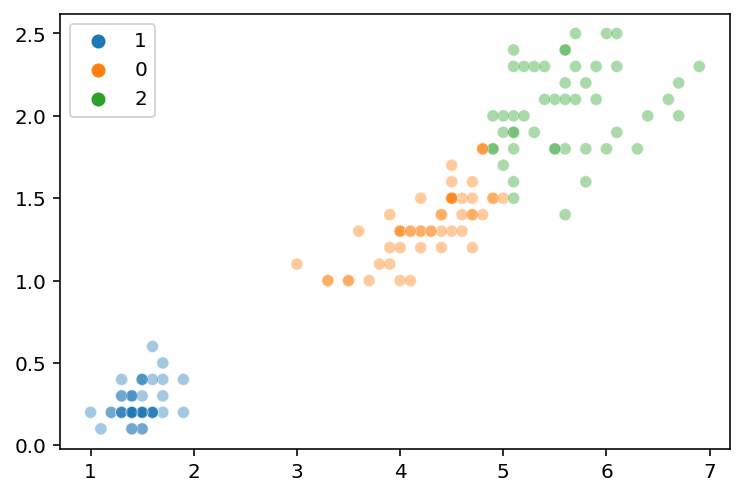

In [147]:
new_labels = [str(i) for i in KMeans(n_clusters = 3).fit_predict(features)]
sns.scatterplot(x = features[:,0], y = features[:, 1], hue = new_labels, alpha = .4)

#### How did we do?

We can ask whether our **cluster labels** correspond to the true category structure of `species` using a technique called the **adjusted rand score**.

- The [**Rand Index**](https://en.wikipedia.org/wiki/Rand_index) computes a similarity measure between two clusterings of the same data, ranging from $[0, 1]$.  
- The **adjusted rand score** adjusts for the performance you'd expect by chance.

In [150]:
from sklearn.metrics import adjusted_rand_score

In [151]:
adjusted_rand_score(new_labels, df_iris['species'])

0.8856970310281228

### Determining the optimal $K$

A major challenge with **K-means clustering** is determining the "right" value of $K$.

- If we know the *true* number of categories, we can set $K$ to that. 
   - However, we rarely know this in practice. 
- Additionally, we'd like our method to be able to find the optimal $K$ in an **unsupervised** fashion as well.

There are many different approaches to determining the optimal $K$––still an active area of machine learning research.

#### Conceptual issue: lumpers vs. splitters

Without "ground truth" labels, a set of observations could be described with *very few* or *very many* clusters.

- Minimum number of clusters: $K = 2$.  
- Maximum number of clusters: $K = n$, where $n$ is number of observations.

[Lumpers vs. splitters](https://en.wikipedia.org/wiki/Lumpers_and_splitters): Some people ("lumpers") favor a smaller number of clusters; others ("splitters") favor fine classification distinctions.

> splitters make very small units – their critics say that if they can tell two animals apart, they place them in different genera ... and if they cannot tell them apart, they place them in different species. ... Lumpers make large units – their critics say that if a carnivore is neither a dog nor a bear, they call it a cat. (Simpson, 1945)

#### Approach 1: Elbow method

> The ["elbow method"](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) is an approach for determining the optimal clusters $K$, which involves identifying the *smallest* value of $K$ that significantly reduces within-cluster variation.

Basic intuition:

- **Accuracy**: We want a set of clusters that reduce within-cluster variation as much as possible.
- **Parsimony**: We don't want *too many clusters*.
   - $K = n$ would have `0` within-cluster variance, but wouldn't be very useful!

##### Elbow method in practice (pt. 1)

The average **within-cluster variation** can be accessed for a given `KMeans` model using the `inertia_` attribute.

In [156]:
sse = []
for k in range(2, 21):
    km = KMeans(n_clusters = k).fit(features)
    sse.append({'k': k, 'sse': km.inertia_})

In [155]:
df = pd.DataFrame(sse)
df.head(1)

,k,sse
0,2,86.39022


##### Elbow method in practice (pt. 2)

> The **elbow** (or ["knee"](https://en.wikipedia.org/wiki/Knee_of_a_curve)) is the point at which a curve visibly bends.

Based on these results, the optimal $K$ is between 3-5. 

<AxesSubplot:xlabel='k', ylabel='sse'>

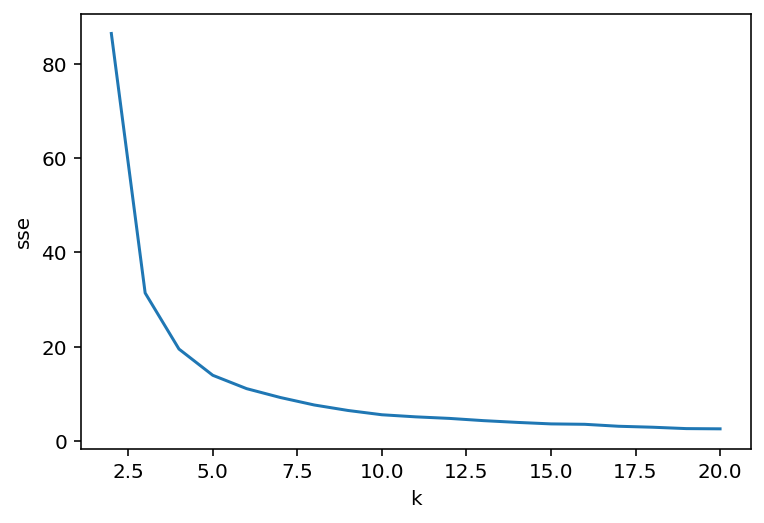

In [154]:
sns.lineplot(data = df, x = 'k', y = 'sse')

#### Approach 2: Silhouette analysis

> [**Silhouette analysis**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) measures the difference between each point's distance from all points in *other clusters* and each point's distance from all points in the *same* clusters. 

- The silhouette score ranges from `-1` (very bad) to `1` (very good).
- Like $SSE$, this will capture the amount of **within-cluster variance**.  
- Unlike $SSE$, it also rewards **distant clusters**.

That is: **Minimize within-cluster distance, maximize across-cluster distance**.

#### Silhouette analysis in `sklearn` (pt. 1)

In [167]:
from sklearn.metrics import silhouette_score

In [168]:
ss = []
for k in range(2, 21):
    new_labels = KMeans(n_clusters = k).fit_predict(features)
    ss.append({'k': k, 'ss': silhouette_score(features, new_labels)})
df = pd.DataFrame(ss)
df.head(1)

,k,ss
0,2,0.76539


#### Silhouette analysis in `sklearn` (pt. 2)

Unlike with $SSE$, the silhouette score does *not* monotonically improve as $K$ increases.

<AxesSubplot:xlabel='k', ylabel='ss'>

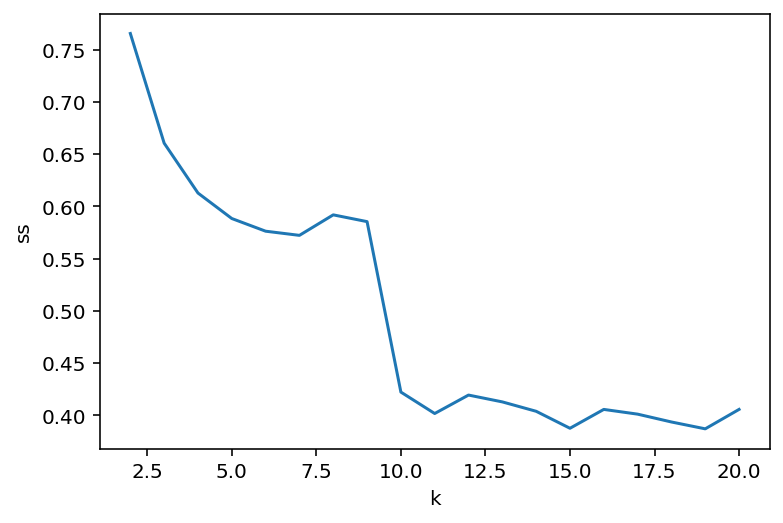

In [170]:
sns.lineplot(data = df, x = "k", y = "ss")

### Limitations of $K$-means

As with any model, $K$-means has a number of **limitations**, including:

- You must choose $K$ manually, and there's no "perfect" method for choosing the right $K$.  
- It's dependent on your `random_state` (global optimum is not guaranteed). 
- It's sensitive to **outliers**, which will affect the *centroid* of a cluster.
- In "vanilla" formulation, does not handle clusters of different **sizes** or **shapes**.

#### Clusters aren't always spheroidal!



In [171]:
from sklearn.datasets import make_moons

<AxesSubplot:>

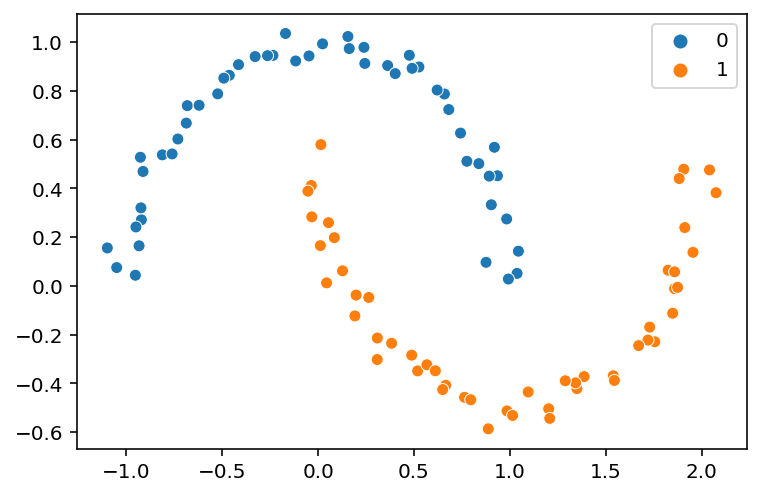

In [172]:
X, y = make_moons(n_samples=100, noise = .05)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)

#### `KMeans` falters with non-spheroidal data

<AxesSubplot:>

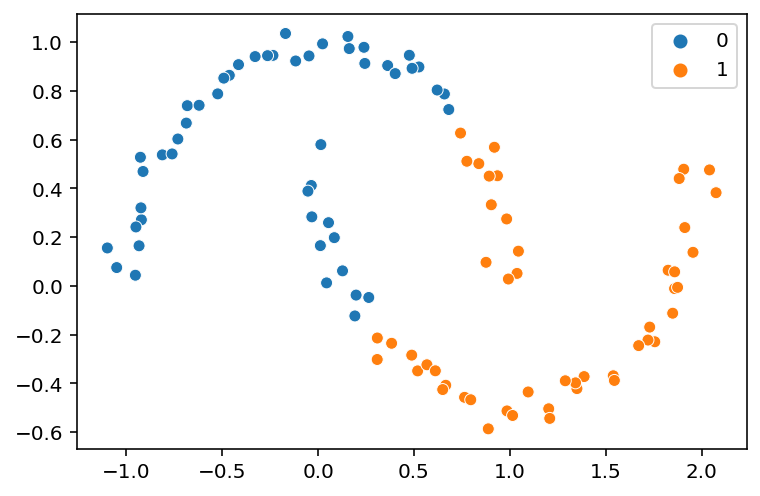

In [173]:
k = KMeans(n_clusters=2)
new_labels = k.fit_predict(X)
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = new_labels)

### Clustering beyond $K$-means

There are *many* algorithms for unsupervised clustering:

- [Hierarchical clustering](https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp): iteratively join pairs of points into clusters, then group clusters together, and so on.
- [Gaussian mixture model](https://scikit-learn.org/stable/modules/mixture.html): tries to estimate $K$ latent **Gaussian** functions responsible for generating data.
   - Can be used as a more flexible, general form of K-means.
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN): density-based spatial clustering of applications with noise.
   - Unlike K-means, does not require specification of $K$, and can fit more flexible cluster shapes.

## Conclusion

- **Unsupervised learning** is an integral part of computational social science.
- One approach is **clustering**, which involves sorting $n$ data points into $k$ groups.  
- **K-means clustering** is an *iterative algorithm* that:
   - Given some value of $K$...
   - ... tends to find the clusters that reduce **within-cluster variation**.
- The **elbow method** and **silhouette analysis** are two approaches to evaluating your clusters.